In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder

**Домашнее задание**

1. Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

2. Построить график Precision - Recall на этих же данных.

Чтобы не повторяться, решил отойти немного от исходного задания и использовать другой дата-сет, тем более, что он все равно был в архиве к ДЗ. В итоге работал на датасете adults.csv.
<br/>
<br/> Также я решил использовать отдельный ноутбук, поскольку при работе в ноутбуке ст лекции постоянно возникали проблемы с рачетами, так как названия переменных из него и тех, которые я создавал где-то могли пересекаться (и пересекались)

In [7]:
adults = pd.read_csv('adult.csv')
adults.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
X_adults = pd.get_dummies(adults.loc[:, ['age', 'marital-status', "race"]])
X_adults.head()

,age,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,0,0,0,0,1,0,0,0,0,1,0,0
1,38,0,0,1,0,0,0,0,0,0,0,0,1
2,28,0,0,1,0,0,0,0,0,0,0,0,1
3,44,0,0,1,0,0,0,0,0,0,1,0,0
4,18,0,0,0,0,1,0,0,0,0,0,0,1


In [68]:
le = LabelEncoder()
le.fit(adults['income'])
Y_adults = pd.Series(data = le.transform(adults['income']))# делаем одну колонку со значениями для двоичной классификации по Y
Y_adults.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

разделяем выборку:

In [13]:
X_adults_train, X_adults_test, Y_adults_train, Y_adults_test = train_test_split(X_adults, Y_adults, test_size = 0.3, random_state = 5)

In [70]:
adults_model = LogisticRegression()

**дальше код выполняется, но вылезает какая-то ошибка**
<br>
Поскольку код, все же, выполнялся, я данную ошикбку проигнорировал

In [72]:
adults_model.fit(X_adults_train, Y_adults_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
adults_predictions = adults_model.predict_proba(X_adults_test)

In [76]:
adults_model.score(X_adults_test, Y_adults_test)

0.747628471985259

**1. Начинаем считать вручную ROC, а далее проверим сходство графика с построенным стандартными методами из библиотек**
<br/>

**ROC**

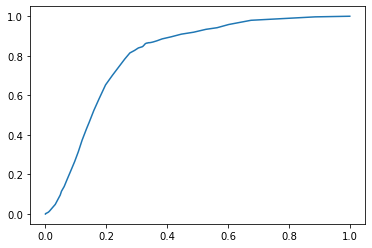

In [77]:
score = np.array(adults_predictions[:, 1])
y = np.array(Y_adults_test)

# будущий спсиок значений Precision
precision = []
# false positive rate
fpr = []
# true positive rate
tpr = []
# Iterate thresholds from 0.0, 0.01, ... 1.0
thresholds = np.arange(0.0, 1.01, .01)

P = sum(y) # получаем общую сумму всех положительных значений по Y
N = len(y) - P # получаем общую сумму всех нулевых значений по Y

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(score)):
        if (score[i] > thresh):
            if y[i] == 1:
                TP += 1
            if y[i] == 0:
                FP += 1
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))
    try:
        precision.append(TP/(TP+FP))
    except ZeroDivisionError:
        precision.append(0)
    
    

plt.plot(fpr, tpr)
plt.show()

**А теперь посмотрим, как выглядит ROC при использовании станартных методов из библиотек:**

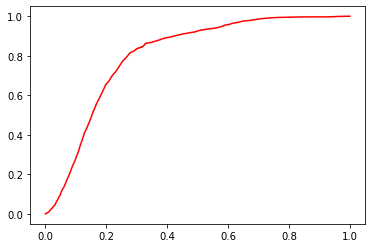

In [78]:
fpr_automatic, tpr_automatic, thres_automatic = roc_curve( Y_adults_test, adults_predictions[:, 1] )
plt.plot(fpr_automatic, tpr_automatic, c='r')
# plt.plot(fpr, tpr)

**Налицо полная идентичность графиков выше** (если их наложить, то они полностью сольются, так что не стал этого делать).
<p>
 <br/>
 <br/>
 <br/>
 <p/>

**2. Строим график Precision - Recall на этих же данных.**

In [62]:
from sklearn.metrics import precision_recall_curve

In [63]:
pr, re, thres = precision_recall_curve( Y_adults_test, predictions[:, 1] )

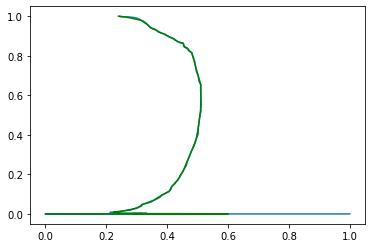

In [66]:
plt.plot(pr, re)
plt.plot(precision, tpr, c = 'g')
plt.show()

Здесь я специально наложил графики, поскольку по умолчанию они оба строятся на несколько разных сетках (стандартными методами строится линия до 1.0, тогда как вручную рассчитаны значения только до 0,6). Но общая картина абсолютно идентична, что и видно выше.